In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest, getCountDFbyPrefix

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures

mkdir: ../jupyter_figures: File exists


In [4]:
# Read in the raw data sets to plot
# These are from two experiments with DMSO or ABA treated control or E-cad down spheroids

datasetPrefix = "190926"
df1 = getCountDFbyPrefix(datasetPrefix)

datasetPrefix = "191008"
df2 = getCountDFbyPrefix(datasetPrefix)


In [5]:
# Annotate data sets with the experimental conditions

# datasetPrefix: "190926"
# 88 spheroids in wells A1-H11 (last column not accessible for automated imaging)
#
# Plate layout:
# A1-A6: sg-control, DMSO, ***no MG***
# A7-A11: sg-control, ABA, ***no MG***
# B1-B6: sg-control, DMSO, MG
# B7-B11: sg-control, ABA, MG
# C1-C6: sg-control mixed with sg1-Ecad (4:1), DMSO, ***no MG***
# C7-C11: sg-control mixed with sg1-Ecad (4:1), ABA, ***no MG***
# D1-D11: sg-control mixed with sg1-Ecad (4:1), DMSO, MG
# E1-G11: sg-control mixed with sg1-Ecad (4:1), ABA, MG
# H1-H11: sg-control mixed with ***sg2-Ecad*** (4:1), ABA, MG
#
# This set of files contains 6, 5, 11, 33 and 11 samples for groups 1-4 and 6:
# Group 1: sg-Control only, DMSO, MG
# Group 2: sg-Control only, ABA, MG
# Group 3: sg-Control mixed with sg1-Ecad (4:1), DMSO, MG
# Group 4: sg-Control mixed with sg1-Ecad (4:1), ABA, MG
# Group 6: sg-Control mixed with sg2-Ecad (4:1), ABA, MG
groups1 = ["zzz_ignore"]*11 + ["1"]*6 + ["2"]*5 + \
            ["zzz_ignore"]*11 + ["3"]*11 + ["4"]*33 + ["6"]*11

# print(groups1)


# datasetPrefix: "191008"
# 73 spheroids in wells A1-H11 (last column not accessible for automated imaging)
# In addition, B1-B3, D1-D6 and G1-G6 were left out when imaging for fluorescence
# because they were treated with blebbistatin and were photo-sensitive.
# Y: B4-B6, E1-E6 and H1-H6.
#
# Plate layout:
# A1-A3: sg-control, DMSO, ***no MG***
# A4-A6: sg-control, ABA, ***no MG*** 
# A7-A11: sg-control, DMSO, MG
# B4-B6: sg-control, ABA, MG, ***Y27632***
# B7-B11: sg-control, ABA, MG
# C1-C3: sg-control mixed with sg1-Ecad (4:1), DMSO, ***no MG***
# C4-C6: sg-control mixed with sg1-Ecad (4:1), ABA, ***no MG***
# C7-C11: sg-control mixed with sg1-Ecad (4:1), DMSO, MG
# D7-D11 & E7-E11: sg-control mixed with sg1-Ecad (4:1), ABA, MG
# E1-E6: sg-control mixed with sg1-Ecad (4:1), ABA, MG, ***Y27632***
# F1-F3: sg-control mixed with sg2-Ecad (4:1), DMSO, ***no MG***
# F4-F6: sg-control mixed with sg2-Ecad (4:1), ABA, ***no MG***
# F7-F11: sg-control mixed with sg2-Ecad (4:1), DMSO, MG
# G7-G11 & H7-H11: sg-control mixed with sg2-Ecad (4:1), ABA, MG
# H1-H6: sg-control mixed with sg2-Ecad (4:1), ABA, MG, ***Y27632***
#
# To sum the ones I need to plot:
# Group 1: sg-Control only, DMSO, MG
# Group 2: sg-Control only, ABA, MG
# Group 3: sg-Control mixed with sg1-Ecad (4:1), DMSO, MG
# Group 4: sg-Control mixed with sg1-Ecad (4:1), ABA, MG
# Group 5: sg-Control mixed with sg2-Ecad (4:1), DMSO, MG
# Group 6: sg-Control mixed with sg2-Ecad (4:1), ABA, MG
# Other samples will be annotated "zzz_ignore" for the purpose of this plotting
groups2 = ["zzz_ignore"]*6 + ["1"]*5 + ["zzz_ignore"]*3 + ["2"]*5 + \
        ["zzz_ignore"]*6 + ["3"]*5 + ["4"]*5 + ["zzz_ignore"]*6 + ["4"]*5 + \
        ["zzz_ignore"]*6 + ["5"]*5 + ["6"]*5 + ["zzz_ignore"]*6 + ["6"]*5


In [6]:
df = pd.concat([df1,df2])
df["groups"] = groups1 + groups2
groupsToKeep = ["1", "2", "3", "4"]
# print(df1and2.groups)
dfToPlot = df.loc[df['groups'].isin(groupsToKeep)]

# Pass to general df variable to ease the plotting
df = dfToPlot
df['data_to_compare'] = df.counts
df.to_csv('../data_cleaned/' + '190926-191008-dataset-groups1-4-bud-count.csv')
# Inspect raw data if curious about how they look
# sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)


Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -0.3455   0.9 -7.3301  6.6392  False
     1      3   -0.233   0.9 -6.4942  6.0282  False
     1      4  15.9894 0.001 10.5881 21.3907   True
     2      3   0.1125   0.9 -6.3316  6.5566  False
     2      4  16.3349 0.001 10.7226 21.9471   True
     3      4  16.2224 0.001 11.5411 20.9037   True
---------------------------------------------------
p values of all pair-wise tests:
 [0.9   0.9   0.001 0.9   0.001 0.001]


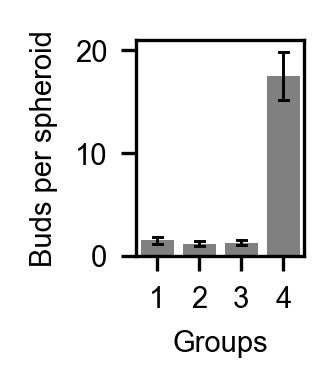

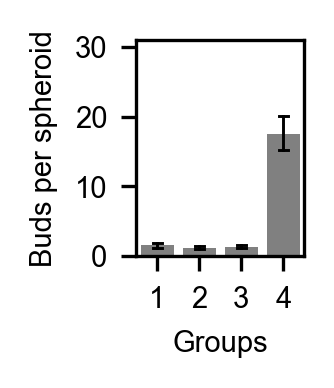

In [7]:
outputPrefix = "190916-191008-6dpt-combined-4groups"
outputFigPath = "../jupyter_figures/" + outputPrefix + "-bud-count-taller-bar.svg"
plotCountBar(df.groups, df.counts, outputFigPath, yMax=21, yTicks=[0,10,20], fig_width=0.7, fig_height=0.9)
outputPrefix = "190916-191008-6dpt-combined-4groups"
outputFigPath = "../jupyter_figures/" + outputPrefix + "-bud-count-shorter-bar.svg"
plotCountBar(df.groups, df.counts, outputFigPath, yMax=31, yTicks=[0,10,20,30], fig_width=0.7, fig_height=0.9)


In [8]:
df = pd.concat([df1,df2])
df["groups"] = groups1 + groups2
groupsToKeep = ["1", "2", "3", "4", "5", "6"]
# print(df1and2.groups)
dfToPlot = df.loc[df['groups'].isin(groupsToKeep)]

# Pass to general df variable to ease the plotting
df = dfToPlot
df['data_to_compare'] = df.counts
df.to_csv('../data_cleaned/' + '190926-191008-dataset-groups1-6-bud-count.csv')

# Inspect raw data if curious about how they look
# sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)


Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -0.3455    0.9  -8.3623  7.6714  False
     1      3   -0.233    0.9  -7.4195  6.9536  False
     1      4  15.9894  0.001   9.7899  22.189   True
     1      5   2.4545    0.9  -7.4417 12.3508  False
     1      6  18.4069  0.001  11.5779  25.236   True
     2      3   0.1125    0.9  -7.2839  7.5089  False
     2      4  16.3349  0.001   9.8932 22.7765   True
     2      5      2.8    0.9  -7.2497 12.8497  False
     2      6  18.7524  0.001  11.7028  25.802   True
     3      4  16.2224  0.001  10.8493 21.5955   True
     3      5   2.6875    0.9  -6.7131 12.0881  False
     3      6  18.6399  0.001  12.5512 24.7286   True
     4      5 -13.5349  0.001 -22.2044 -4.8654   True
     4      6   2.4175 0.6793  -2.4672  7.3022  False
     5      6  15.9524  0.001   6.8221 25.0827   True
----------

In [9]:
df.counts[df.groups=='5']

52    6
53    4
54    3
55    4
56    3
Name: counts, dtype: int64

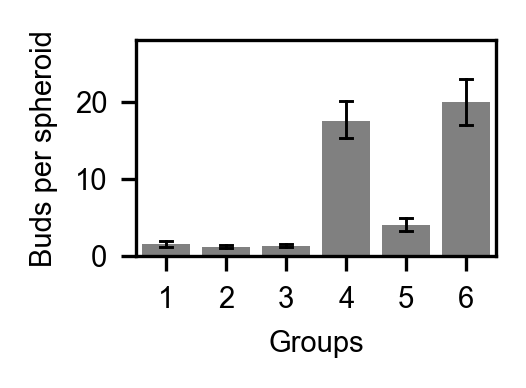

In [10]:
outputPrefix = "190916-191008-6dpt-combined-6groups"
outputFigPath = "../jupyter_figures/" + outputPrefix + "-bud-count.svg"
plotCountBar(df.groups, df.counts, outputFigPath, yMax=28, yTicks=[0,10,20], fig_width=1.5, fig_height=0.9)


In [11]:
# Read in the data and put into a data frame
datasetPrefix = "20191219-6dpt-zStack-integrin-activation"
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
#
# The layout of this data set is straightforward.
# For integrin activation test, only Matrigel was added (no ABA)
# Integrin activation was done by adding 50 uM MnCl2, 10 ug/mL TS2/16 or both
#
# Group 1, B2-B11: sg-Control only
# Group 2, C2-C6: sg-Control only, 50 uM MnCl2
# Group 3, C7-C11: sg-Control only, 10 ug/mL TS2/16
# Group 4, D2-D11: sg-Control only, 50 uM MnCl2 and 10 ug/mL TS2/16
# Group 5, E2-E11: sg-Control mixed with sg2-Ecad (4:1)
# Group 6, F2-F6: sg-Control mixed with sg2-Ecad (4:1), 50 uM MnCl2
# Group 7, F7-F11: sg-Control mixed with sg2-Ecad (4:1), 10 ug/mL TS2/16
# Group 8, G2-G11: sg-Control mixed with sg2-Ecad (4:1), 50 uM MnCl2 and 10 ug/mL TS2/16

groups = ["1"]*10 + ["2"]*5 + ["3"]*5 + ["4"]*10 +\
            ["5"]*10 + ["6"]*5 + ["7"]*5 + ["8"]*10
df["groups"] = groups


# # Inspect raw data if curious about how they look
# sns.swarmplot(df.groups, df.counts)

# # Perform a Tukey test across groups
# tukeyTest(df.counts, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      5      4.0 0.0077 1.0092  6.9908   True
     1      6     10.2  0.001 6.5371 13.8629   True
     5      6      6.2  0.001 2.5371  9.8629   True
---------------------------------------------------
p values of all pair-wise tests:
 [0.00765765 0.001      0.001     ]


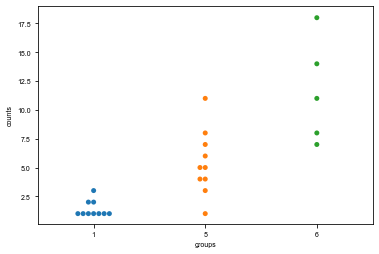

In [12]:
groupsToKeep = ["1", "5", "6"]
dfKeep = df.loc[df['groups'].isin(groupsToKeep)]

# Use general df variable to ease the plotting
df = dfKeep
df['data_to_compare'] = df.counts
df.to_csv('../data_cleaned/' + datasetPrefix + '-bud-count.csv')

# Inspect raw data if curious about how they look
sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)


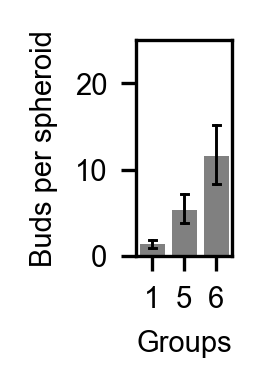

In [13]:
# Plot the bar graph to put in figures
outputPrefix = "191219-6dpt-integrin-activation"
outputFigPath = "../jupyter_figures/" + outputPrefix + "-bud-count.svg"
plotCountBar(df.groups, df.counts, outputFigPath, yMax=25, yTicks=[0,10,20], fig_width=0.4, fig_height=0.9)


Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2     -0.6   0.9  -3.6569   2.4569  False
     1      3   -19.75 0.001 -22.3973 -17.1027   True
     1      4    -19.9 0.001 -22.5473 -17.2527   True
     2      3   -19.15 0.001 -21.7973 -16.5027   True
     2      4    -19.3 0.001 -21.9473 -16.6527   True
     3      4    -0.15   0.9  -2.3115   2.0115  False
-----------------------------------------------------
p values of all pair-wise tests:
 [0.9   0.001 0.001 0.001 0.001 0.9  ]


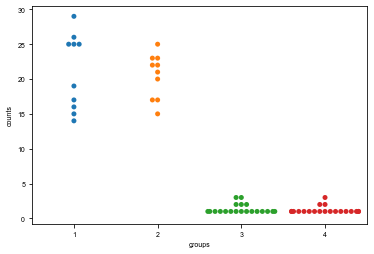

In [14]:
# Read in the data and put into a data frame
datasetPrefix = "20191219-6dpt-zStack-D193-D267-D301-D2"
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
#
# The layout of this data set is straightforward.
# For integrin co-repression, all spheroids were treated with Matrigel and ABA
#
# Group 1, B2-B11: sg-control mixed with sg1-Ecad (1:1)
# Group 2, C2-C11: sg-Itgb1 mixed with sg1-Ecad (1:1)
# Group 3, D2-E11: sg-control mixed with sg1-Ecad/sg-Itgb1 (1:1)
# Group 4, F2-G11: sg-Itgb1 mixed with sg1-Ecad/sg-Itgb1 (1:1)
groups = ["1"]*10 + ["2"]*10 + ["3"]*20 + ["4"]*20
df["groups"] = groups

df['data_to_compare'] = df.counts
df.to_csv('../data_cleaned/' + datasetPrefix + '-bud-count.csv')

# Inspect raw data if curious about how they look
sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)


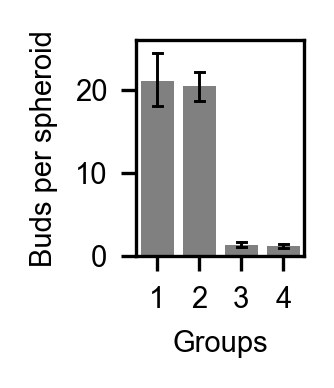

In [15]:
# Plot the bar graph to put in figures
outputPrefix = "191219-6dpt-D193-D267-D301-D2-"
outputFigPath = "../jupyter_figures/" + outputPrefix + "-bud-count.svg"
plotCountBar(df.groups, df.counts, outputFigPath, yMax=26, yTicks=[0,10,20], fig_width=0.7, fig_height=0.9)


Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  -4.8889 0.0058  -8.6328   -1.145   True
     1      3 -30.1056  0.001 -33.6696 -26.5415   True
     1      4 -30.7556  0.001 -34.8354 -26.6757   True
     2      3 -25.2167  0.001 -28.2496 -22.1838   True
     2      4 -25.8667  0.001 -29.4917 -22.2416   True
     3      4    -0.65    0.9   -4.089    2.789  False
------------------------------------------------------
p values of all pair-wise tests:
 [0.00576642 0.001      0.001      0.001      0.001      0.9       ]


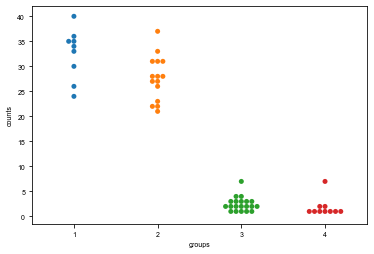

In [16]:
# Read in the data and put into a data frame
datasetPrefix = "20191224-6dpt-zStack-D193-D267-D301-D2-integrin-co-modulation-repeat"
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
#
# The layout of this data set is straightforward.
# For integrin co-repression, all spheroids were treated with Matrigel and ABA
#
# Group 1, B2-B11: sg-control mixed with sg1-Ecad (1:1)
# Group 2, C2-D11: sg-Itgb1 mixed with sg1-Ecad (1:1)
# Group 3, E2-F11: sg-control mixed with sg1-Ecad/sg-Itgb1 (1:1)
# Group 4, G2-G11: sg-Itgb1 mixed with sg1-Ecad/sg-Itgb1 (1:1)
# ***Note: B4, D2, D6, D7, D9 and D10 images were off-center or off-focus,
# so they were removed for segmentation
groups = ["1"]*9 + ["2"]*15 + ["3"]*20 + ["4"]*10
df["groups"] = groups

# Inspect raw data if curious about how they look
sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)


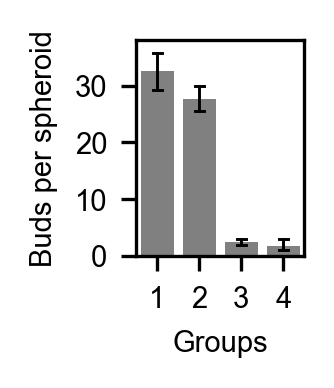

In [17]:
# Plot the bar graph to put in figures
outputPrefix = "191224-6dpt-D193-D267-D301-D2-"
outputFigPath = "../jupyter_figures/" + outputPrefix + "-bud-count.svg"
plotCountBar(df.groups, df.counts, outputFigPath, yMax=38, yTicks=[0,10,20,30], fig_width=0.7, fig_height=0.9)


Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2     -0.1    0.9  -4.439   4.239  False
     1      3      4.6  0.083 -0.4102  9.6102  False
     1      4     11.7  0.001   7.361  16.039   True
     2      3      4.7 0.0289   0.361   9.039   True
     2      4     11.8  0.001  8.2572 15.3428   True
     3      4      7.1  0.001   2.761  11.439   True
----------------------------------------------------
p values of all pair-wise tests:
 [0.9        0.08295638 0.001      0.02885341 0.001      0.001     ]


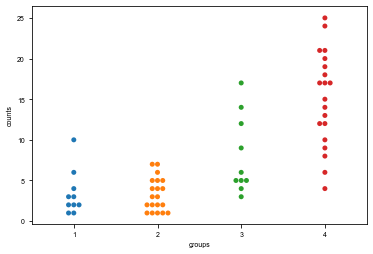

In [18]:
# Read in the data and put into a data frame
datasetPrefix = "20200120-6dpt-integrin-activation-MnCl2"
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
#
# The layout of this data set is straightforward.
#
# Group 1, B2-B11: sg-Control only
# Group 2, C2-D11: sg-Control only, 50 uM MnCl2
# Group 3, E2-E11: sg-Control mixed with sg2-Ecad (4:1)
# Group 4, F2-G6: sg-Control mixed with sg2-Ecad (4:1), 50 uM MnCl2

groups = ["1"]*10 + ["2"]*20 + ["3"]*10 + ["4"]*20
df["groups"] = groups

# Inspect raw data if curious about how they look
sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)


Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      3      4.6 0.1128 -0.8564 10.0564  False
     1      4     11.7  0.001  6.9746 16.4254   True
     3      4      7.1 0.0022  2.3746 11.8254   True
----------------------------------------------------
p values of all pair-wise tests:
 [0.11279151 0.001      0.00215368]


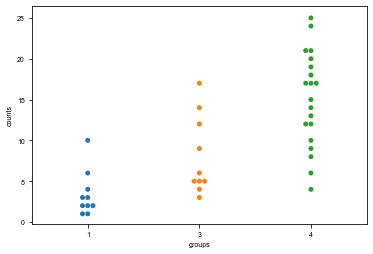

In [19]:
groupsToKeep = ["1", "3", "4"]
dfKeep = df.loc[df['groups'].isin(groupsToKeep)]

# Use general df variable to ease the plotting
df = dfKeep
df['data_to_compare'] = df.counts
df.to_csv('../data_cleaned/' + datasetPrefix + '-bud-count.csv')

# Inspect raw data if curious about how they look
sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)


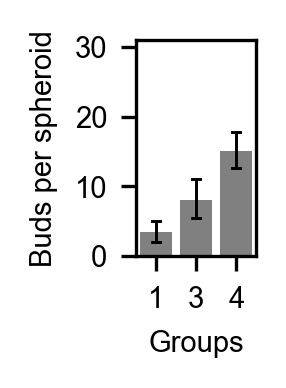

In [20]:
# Plot the bar graph to put in figures
outputPrefix = "20200120-6dpt-integrin-activation-MnCl2"
outputFigPath = "../jupyter_figures/" + outputPrefix + "-bud-count.svg"
plotCountBar(df.groups, df.counts, outputFigPath, yMax=31, yTicks=[0,10,20,30], fig_width=0.5, fig_height=0.9)


Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2     5.55 0.2186  -1.978  13.078  False
     1      3     10.8 0.0092  2.1074 19.4926   True
     1      4     26.4  0.001  18.872  33.928   True
     2      3     5.25 0.2629  -2.278  12.778  False
     2      4    20.85  0.001 14.7034 26.9966   True
     3      4     15.6  0.001   8.072  23.128   True
----------------------------------------------------
p values of all pair-wise tests:
 [0.2186398  0.00915167 0.001      0.26292699 0.001      0.001     ]


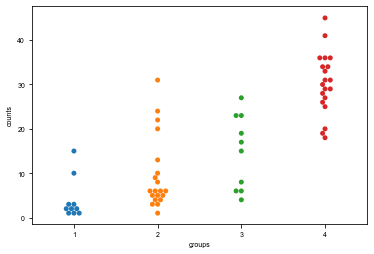

In [21]:
# Read in the data and put into a data frame
datasetPrefix = "20200122-8dpt-integrin-activation-MnCl2"
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
#
# The layout of this data set is straightforward.
#
# Group 1, B2-B11: sg-Control only
# Group 2, C2-D11: sg-Control only, 50 uM MnCl2
# Group 3, E2-E11: sg-Control mixed with sg2-Ecad (4:1)
# Group 4, F2-G6: sg-Control mixed with sg2-Ecad (4:1), 50 uM MnCl2

groups = ["1"]*10 + ["2"]*20 + ["3"]*10 + ["4"]*20
df["groups"] = groups

# Inspect raw data if curious about how they look
sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)


Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      3     10.8 0.0032  3.321 18.279   True
     1      4     26.4  0.001 19.923 32.877   True
     3      4     15.6  0.001  9.123 22.077   True
--------------------------------------------------
p values of all pair-wise tests:
 [0.00321349 0.001      0.001     ]


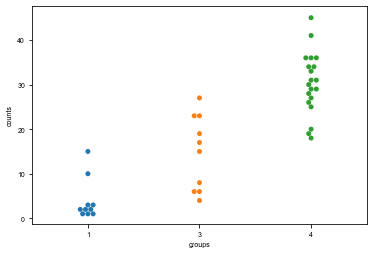

In [22]:
groupsToKeep = ["1", "3", "4"]
dfKeep = df.loc[df['groups'].isin(groupsToKeep)]

# Use general df variable to ease the plotting
df = dfKeep
df['data_to_compare'] = df.counts
df.to_csv('../data_cleaned/' + datasetPrefix + '-bud-count.csv')

# Inspect raw data if curious about how they look
sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)


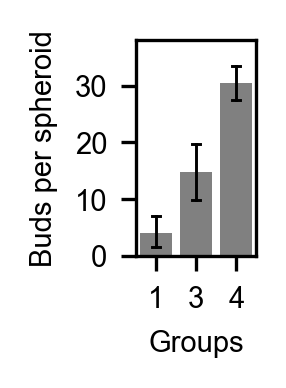

In [23]:
# Plot the bar graph to put in figures
outputPrefix = "20200122-8dpt-integrin-activation-MnCl2"
outputFigPath = "../jupyter_figures/" + outputPrefix + "-bud-count.svg"
plotCountBar(df.groups, df.counts, outputFigPath, yMax=38, yTicks=[0,10,20,30], fig_width=0.5, fig_height=0.9)


In [142]:
# Read in the data and put into a data frame
datasetPrefix = "20200909-6dpt-D193-D267-1to1-MG-LMN-mix-plate1"
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# Group 1, B2-B11: MG alone
# Group 2, C2-C11: 5 MG + 1 LMN
# Group 3, D2-D11: 2 MG + 1 LMN
# Group 4, D2-D11: 1 MG + 1 LMN
# Group 5, E2-E11: 1 MG + 2 LMN
# Group 6, E2-E11: 1 MG + 5 LMN
groups = ["1"]*10 + ["2"]*10 + ["3"]*10 + ["4"]*10 + ["5"]*10 + ["6"]*10
df["groups"] = groups

df1 = df


# Read in the data and put into a data frame
datasetPrefix = "20200909-6dpt-D193-D267-1to1-MG-LMN-mix-plate2-selected"
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# Group 1, B2-B11: LMN alone
# Group 2, C2-C11: MG alone (diluted from 9.7 mg/mL, rather than 6 mg/mL)

groups = ["7"]*10 + ["8"]*10
df["groups"] = groups

df2 = df


In [143]:
# Combine the data for plotting.
# Filter out the 10 spheroids in the second plate that uses different Matrigel stock.
df = pd.concat([df1, df2.iloc[:10, :]])
df.reset_index(inplace=True)

df
# # Inspect raw data if curious about how they look
# sns.swarmplot(df.groups, df.counts)

# # Perform a Tukey test across groups
# tukeyTest(df.counts, df.groups)


,index,file_name,scrambled_file_name,counts,groups
0,0,"Plate000_WellB02_ChannelMono,GFP,RFP_Seq0000.nd2",0a7f2b85856b838896920c032b5160db.nd2,9,1
1,1,"Plate000_WellB03_ChannelMono,GFP,RFP_Seq0001.nd2",eae2cf4d0a05e300e586916c4f7fa2c3.nd2,15,1
2,2,"Plate000_WellB04_ChannelMono,GFP,RFP_Seq0002.nd2",30aa897cd645456df633a9a99880504e.nd2,16,1
3,3,"Plate000_WellB05_ChannelMono,GFP,RFP_Seq0003.nd2",cd060b1e55f3c6da837db6df128ad4f7.nd2,16,1
4,4,"Plate000_WellB06_ChannelMono,GFP,RFP_Seq0004.nd2",5980a4022129b02be6773666687f4c1e.nd2,15,1
...,...,...,...,...,...
65,5,"Plate000_WellB07_ChannelMono,GFP,RFP_Seq0005.nd2",65cd9ac2946125592d8bfb2c72346466.nd2,2,7
66,6,"Plate000_WellB08_ChannelMono,GFP,RFP_Seq0006.nd2",d41a394699e4a508d59fbd3a78d079f2.nd2,4,7
67,7,"Plate000_WellB09_ChannelMono,GFP,RFP_Seq0007.nd2",9f7278d9d4f7c0bfefb866eaff1a1f84.nd2,1,7
68,8,"Plate000_WellB10_ChannelMono,GFP,RFP_Seq0008.nd2",8ad65f4689a0f0f2de3f1e81e67ad8f5.nd2,2,7


Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2     -4.4 0.1044  -9.2845  0.4845  False
     1      3     -5.9 0.0084 -10.7845 -1.0155   True
     1      4     -7.4  0.001 -12.2845 -2.5155   True
     1      5     -9.1  0.001 -13.9845 -4.2155   True
     1      6     -9.4  0.001 -14.2845 -4.5155   True
     1      7    -11.3  0.001 -16.1845 -6.4155   True
     2      3     -1.5    0.9  -6.3845  3.3845  False
     2      4     -3.0 0.5057  -7.8845  1.8845  False
     2      5     -4.7  0.067  -9.5845  0.1845  False
     2      6     -5.0 0.0415  -9.8845 -0.1155   True
     2      7     -6.9 0.0011 -11.7845 -2.0155   True
     3      4     -1.5    0.9  -6.3845  3.3845  False
     3      5     -3.2 0.4301  -8.0845  1.6845  False
     3      6     -3.5 0.3196  -8.3845  1.3845  False
     3      7     -5.4  0.021 -10.2845 -0.5155   True
     4    

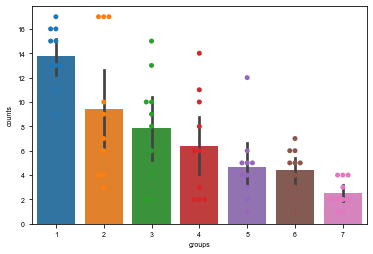

In [144]:
# bar plot of all groups
sns.barplot(df.groups, df.counts)

# Inspect raw data if curious about how they look
sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)


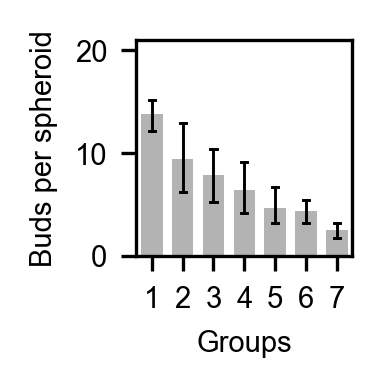

In [150]:
# Plot the bar graph to put in figures
outputPrefix = "20200909-6dpt-D193-D267-1to1-MG-LMN-mix"
outputFigPath = "../jupyter_figures/" + outputPrefix + "-bud-count.svg"
plotCountBar(df.groups, df.counts, outputFigPath,
             yMax=21, yTicks=[0,10,20],
             bar_width=0.7,
             fig_width=0.9, fig_height=0.9)


Summary of test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
  BB-94 Control      9.3  0.001   5.0495 13.5505   True
  BB-94 GM-6001   1.1556    0.9  -3.2114  5.5225  False
  BB-94     LOX   6.9333  0.001   2.5664 11.3003   True
  BB-94     TG5   7.0286  0.001   2.3448 11.7124   True
  BB-94    TG50      7.7  0.001   3.4495 11.9505   True
Control GM-6001  -8.1444  0.001 -12.5114 -3.7775   True
Control     LOX  -2.3667 0.5856  -6.7336  2.0003  False
Control     TG5  -2.2714 0.6804  -6.9552  2.4124  False
Control    TG50     -1.6 0.8609  -5.8505  2.6505  False
GM-6001     LOX   5.7778 0.0047   1.2974 10.2582   True
GM-6001     TG5    5.873 0.0082   1.0833 10.6628   True
GM-6001    TG50   6.5444  0.001   2.1775 10.9114   True
    LOX     TG5   0.0952    0.9  -4.6945   4.885  False
    LOX    TG50   0.7667    0.9  -3.6003  5.1336  False
    TG5    TG50   0.6714    0.

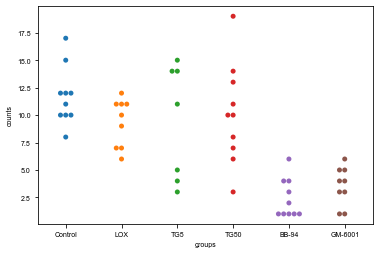

In [11]:
# Read in the data and put into a data frame
datasetPrefix = '20210123'
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
# dataset name: 20210123-plate2-stiffness-D193-D267-1to1-7dpt-rows-singleZ
# new folder name: 20210123
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# B2-B11: Regular formula with 9.0 mg/mL Matrigel.
# C2-C11: Regular formula with 9.0 mg/mL Matrigel + LOX 150 ng/mL.
# D2-D11: Regular formula with 9.0 mg/mL Matrigel + TG 5 mU/mL.
# E2-E11: Regular formula with 9.0 mg/mL Matrigel + TG 50 mU/mL.
# F2-F11: Regular formula with 9.0 mg/mL Matrigel + BB-94 (5 μM).
# G2-G11: Regular formula with 9.0 mg/mL Matrigel + GM-6001 (25 μM).
# excluded: C2, D5, D10, D11, G9
# reason: contaminated (C2; LOX), incomplete image (G9) or off-focus (all others)

groups = ["Control"]*10 + ["LOX"]*9 + ["TG5"]*7 + ["TG50"]*10 + ["BB-94"]*10 + ["GM-6001"]*9
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.counts)

# tukey test
tukeyTest(df.counts, df.groups)

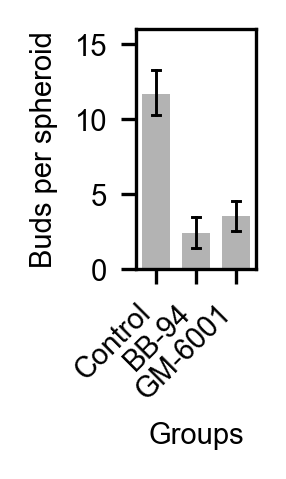

In [19]:
# Plot the bar graph to put in figures
outputPrefix = "20210123-7dpt-D193-D267-1to1-BB94-GM6001"
outputFigPath = "../jupyter_figures/" + outputPrefix + "-bud-count.svg"

# Filter out only Control, BB-94 and GM-6001 data to plot
df = df[df.groups.isin(['Control', 'BB-94', 'GM-6001'])]

plotCountBar(df.groups, df.counts, outputFigPath,
             yMax=16, yTicks=[0,5,10,15],
             yLabel='Buds per spheroid',
             xticklabels_angle=45,
             bar_width=0.7,
             fig_width=0.5, fig_height=1.0)


Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
Anti-β1 Ctrl Ab      6.1 0.0028 2.0022 10.1978   True
Anti-β1   No Ab     10.6  0.001 6.5022 14.6978   True
Ctrl Ab   No Ab      4.5 0.0292 0.4022  8.5978   True
-----------------------------------------------------
p values of all pair-wise tests:
 [0.00277397 0.001      0.02921044]


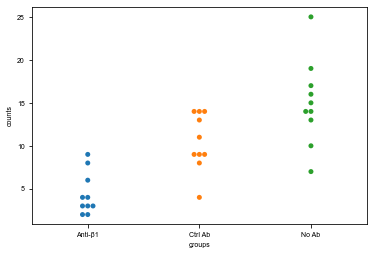

In [2]:
# Read in the data and put into a data frame
datasetPrefix = '20210125-1-'
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
# dataset name: 20210125-D193-D267-mAb13-mAb16-varying-mixing-ratios-6dpt-singleZ2
# new folder name: 20210125-1
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
# Note the D row is the shared control group with another experiment (varying mixing ratios)
#
# B2-B11: mAb13 (beta1-integrin blocking antibody) 100 μg/mL
# C2-C11: mAb16 (alpha5-integrin blocking antibody; serve as isotype-matched control) 100 μg/mL
# D2-D11: no antibody control

# groups = ["mAb13"]*10 + ["mAb16"]*10 + ["noAb"]*10
groups = ["Anti-β1"]*10 + ["Ctrl Ab"]*10 + ["No Ab"]*10
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.counts)

# tukey test
tukeyTest(df.counts, df.groups)

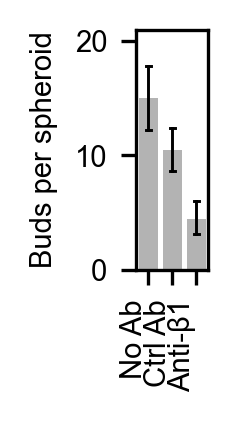

In [10]:
# Plot the bar graph to put in figures
outputPrefix = "20210125-6dpt-D193-D267-1to1-mAb13-mAb16"
outputFigPath = '../jupyter_figures/' + outputPrefix + 'bud-count-bar.svg'

plotCountBar(df.groups, df.counts, outputFigPath,
             plotting_order=['No Ab', 'Ctrl Ab', 'Anti-β1'],
             yMax=21,
             yTicks=[0,10,20],
             yLabel='Buds per spheroid',
             xticklabels_angle=90,
             xLabel_off=True,
             bar_width=0.8,
             fig_width=0.3, fig_height=1.0)


Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     e      f  13.5333  0.001 10.5326  16.534   True
     e      g  11.9333  0.001  8.9326  14.934   True
     e      h      7.2  0.001  4.1993 10.2007   True
     f      g     -1.6 0.4974 -4.6007  1.4007  False
     f      h  -6.3333  0.001  -9.334 -3.3326   True
     g      h  -4.7333  0.001  -7.734 -1.7326   True
----------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.001      0.49742834 0.001      0.001     ]


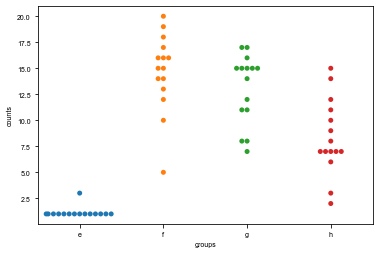

In [16]:
# Read in the data and put into a data frame
datasetPrefix = '20210203'
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
# dataset name: 20210203-D193-D266-varying-mixing-ratios-6dpt
# new folder name: 20210203
#
# sg-Control (D193) : sg2-Cdh1 (D266; stronger guide):
# B2-B11 & C2-C6 (15 wells): 1 : 0
# C7-C11 & D2-D11 (15 wells): 4 : 1
# E2-E11 & F2-F6 (15 wells): 1 : 1
# F7-F11 & G2-G11 (15 wells): 0 : 1

# groups = ["D193"]*15 + ["25%D266"]*15 + ["50%D266"]*15 + ["D266"]*15
# groups = ["1"]*15 + ["2"]*15 + ["3"]*15 + ["4"]*15
groups = ["e"]*15 + ["f"]*15 + ["g"]*15 + ["h"]*15
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.counts)

# tukey test
tukeyTest(df.counts, df.groups)

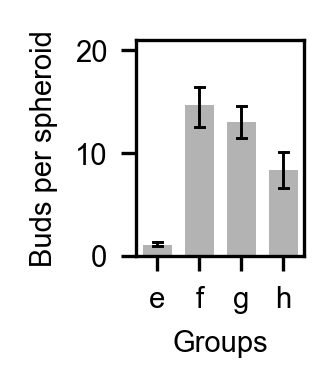

In [17]:
# Plot the bar graph to put in figures
outputPrefix = "20210203-D193-D266-varying-mixing-ratios-6dpt-"
outputFigPath = '../jupyter_figures/' + outputPrefix + 'bud-count-bar.svg'

plotCountBar(df.groups, df.counts, outputFigPath,
             yMax=21,
             yTicks=[0,10,20],
             yLabel='Buds per spheroid',
             bar_width=.7,
             fig_width=.7, fig_height=.9)


Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -7.8947  0.001 -10.7896 -4.9999   True
     1      3 -11.8947  0.001 -15.5512 -8.2383   True
     1      4 -12.0947  0.001  -15.625 -8.5645   True
     2      3     -4.0 0.0253   -7.627  -0.373   True
     2      4     -4.2 0.0126  -7.6997 -0.7003   True
     3      4     -0.2    0.9  -4.3518  3.9518  False
-----------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.001      0.02525077 0.01261139 0.9       ]


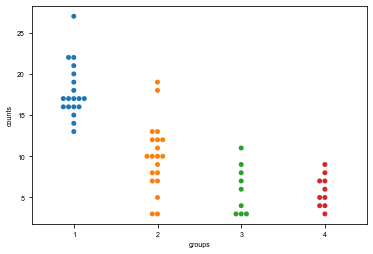

In [7]:
# Read in the data and put into a data frame
datasetPrefix = '20210208'
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
# dataset name: 20210208-D193-D267-4-different-MGs-7dpt
# new folder name: 20210208
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# B2-C11: MG-1 5% + ABA
# D2-E11: MG-2 5% + ABA
# F2-F11: MG-3 5% + ABA
# G2-G11: MG-4 5% + ABA
#
# excluded: B9, F9
# reason: external fiber presence

groups = ["1"]*19 + ["2"]*20 + ["3"]*9 + ["4"]*10
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.counts)

# tukey test
tukeyTest(df.counts, df.groups)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     1      2  -7.9263 0.001 -11.2285 -4.6242   True
----------------------------------------------------
p values of all pair-wise tests:
 0.001


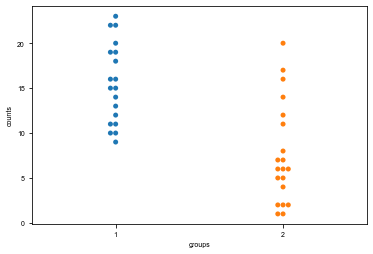

In [8]:
# Read in the data and put into a data frame
datasetPrefix = '20210209-1-'
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
# dataset name: 20210209-D193-D267-BB94-7dpt
# new folder name: 20210209-1
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# D2-E11: Matrigel + ABA
# F2-G11: Matrigel + ABA + BB-94 (5 μM)
#
# excluded: rows B-C; E5
# reason: rows B-C are for other experiments (no Matrigel testing); E5 image is incomplete.

groups = ["1"]*19 + ["2"]*20
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.counts)

# tukey test
tukeyTest(df.counts, df.groups)

Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -4.0111 0.2215  -9.3973   1.375  False
     1      3  -7.7571 0.0044 -13.5341 -1.9802   True
     1      4     -0.4    0.9  -7.3352  6.5352  False
     1      5     -8.9 0.0068 -15.8352 -1.9648   True
     2      3   -3.746 0.3703  -9.6537  2.1616  False
     2      4   3.6111 0.5682  -3.4333 10.6555  False
     2      5  -4.8889 0.2834 -11.9333  2.1555  False
     3      4   7.3571 0.0496   0.0096 14.7047   True
     3      5  -1.1429    0.9  -8.4904  6.2047  False
     4      5     -8.5 0.0423 -16.7891 -0.2109   True
-----------------------------------------------------
p values of all pair-wise tests:
 [0.22150476 0.0043826  0.9        0.00684701 0.37028485 0.56815032
 0.2833891  0.04957685 0.9        0.04233805]


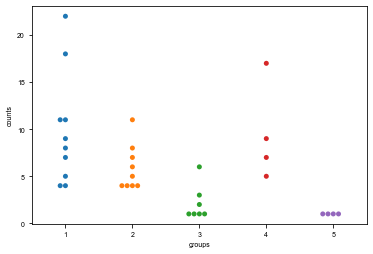

In [9]:
# Read in the data and put into a data frame
datasetPrefix = '20210209-2'
df = getCountDFbyPrefix(datasetPrefix)

# Annotate the data set
# dataset name: 20210209-D193-D267-purified-components-7dpt
# new folder name: 20210209-2
#
# All spheroids were 1-to-1 mixture of D193 (sg-Control) and D267 (sg1-Ecad) cells
#
# B2-B11: (1 row) LMN-R 7.5% or 450 μg/mL (from 6 mg/mL; R&D 3446-005-01)
# C2-C11: (1 row) LMN-R 5% or 300 μg/mL (from 6 mg/mL; R&D 3446-005-01)
# D2-D9: (8 wells) LMN-S 450 μg/mL (stock 1.12 mg/mL; desalted from Sigma CC095)
# E2-E6: (5 wells) LMN-R 5% or 300 μg/mL + Col4-G 150 μg/mL
# F2-F6: (5 wells) LMN-R 5% or 300 μg/mL + Col4-G 150 μg/mL + Nidogen 50 μg/mL + Perlecan 50 μg/mL

# excluded: C8, D8, E2, F5
# reason: external fiber presence

groups = ["1"]*10 + ["2"]*9 + ["3"]*7 + ["4"]*4 + ["5"]*4
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.counts)

# tukey test
tukeyTest(df.counts, df.groups)

Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b     14.8  0.001  10.2387 19.3613   True
     a      c     20.0  0.001  15.4387 24.5613   True
     a      d     13.7  0.001   9.1387 18.2613   True
     b      c      5.2 0.0202   0.6387  9.7613   True
     b      d     -1.1    0.9  -5.6613  3.4613  False
     c      d     -6.3 0.0036 -10.8613 -1.7387   True
-----------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.001      0.02022216 0.9        0.00362311]


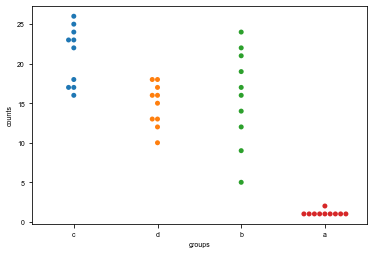

In [19]:
# Read in the data and put into a data frame
datasetFolder = '../data/DLD-1-spheroids-bud-count-KM/'
datasetPrefix = '20210125-2-'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)

# Annotate the data set
# dataset name: 20210125-D193-D267-mAb13-mAb16-varying-mixing-ratios-6dpt-singleZ2
# new folder name: 20210125-2
#
# These are D193 and D267 with varying mixing ratios.
# Note that the control (row D) is shared by the two experiments.
#
# D2-D11: sg-Control (D193) : sg1-Cdh1 (D267) = 1:1
# E2-E11: sg-Control (D193) : sg1-Cdh1 (D267) = 0:1
# F2-F11: sg-Control (D193) : sg1-Cdh1 (D267) = 4:1
# G2-G11: sg-Control (D193) : sg1-Cdh1 (D267) = 1:0

# groups = ["3"]*10 + ["4"]*10 + ["2"]*10 + ["1"]*10
groups = ["c"]*10 + ["d"]*10 + ["b"]*10 + ["a"]*10

df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.counts)

# tukey test
tukeyTest(df.counts, df.groups)

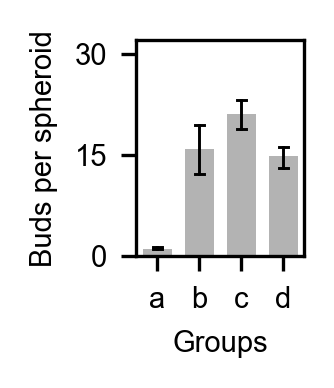

In [20]:
# Plot the bar graph to put in figures
outputPrefix = "20210125-D193-D267-varying-mixing-ratios-6dpt-"
outputFigPath = '../jupyter_figures/' + outputPrefix + 'bud-count-bar.svg'

plotCountBar(df.groups, df.counts, outputFigPath,
             yMax=32,
             yTicks=[0,15,30],
             yLabel='Buds per spheroid',
             plotting_order=['a', 'b', 'c', 'd'],
             bar_width=.7,
             fig_width=.7, fig_height=.9)


Summary of test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2    -18.4  0.001 -23.3014 -13.4986   True
     1      3     -1.5    0.9  -6.4014   3.4014  False
     1      4     -4.3 0.1171  -9.2014   0.6014  False
     1      5    -18.3  0.001 -23.2014 -13.3986   True
     1      6     -4.8 0.0582  -9.7014   0.1014  False
     2      3     16.9  0.001  11.9986  21.8014   True
     2      4     14.1  0.001   9.1986  19.0014   True
     2      5      0.1    0.9  -4.8014   5.0014  False
     2      6     13.6  0.001   8.6986  18.5014   True
     3      4     -2.8 0.5398  -7.7014   2.1014  False
     3      5    -16.8  0.001 -21.7014 -11.8986   True
     3      6     -3.3 0.3626  -8.2014   1.6014  False
     4      5    -14.0  0.001 -18.9014  -9.0986   True
     4      6     -0.5    0.9  -5.4014   4.4014  False
     5      6     13.5  0.001   8.5986  18.4014

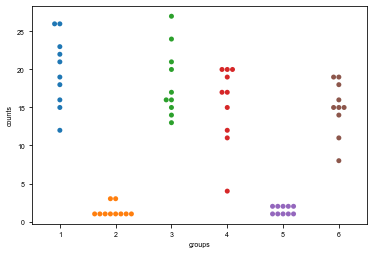

In [2]:
# combine 3 data sets:
# 1. before dispase treatment
# 2. 1 day after dispase treatment and MG-free culture
# 3. 6 days recovery after MG addition

datasetFolder = '../data/DLD-1-spheroids-bud-count-KM/'

# 20210204-D193-D267-DMSO-or-ABA-all-MG-7dpt
# F2-F11: 10 spheroids of D193-D267 mix
# G2-G11: 10 spheroids of D267 only
#
datasetPrefix = '20210204-'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)
df1 = df

# 20210205-
#
# * Note well position change because the spheroids were
# * cultured in a new plate after dispase treatment
#
# B2-B11: 10 spheroids of D193-D267 mix
# C2-C11: 10 spheroids of D267 only
#
datasetPrefix = '20210205-'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)
df2 = df

# 20210211-
#
# * Recovery was by adding 100x 2x treatment mix on 2/5
#
# B2-B11: 10 spheroids of D193-D267 mix
# C2-C11: 10 spheroids of D267 only
#
datasetPrefix = '20210211-'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)
df3 = df

df = pd.concat([df1, df2, df3])

# annotate groups
groups = ["1"]*10 + ["4"]*10 + ["2"]*10 + ["5"]*10 + ["3"]*10 + ["6"]*10
df["groups"] = groups

# quick visualization
sns.swarmplot(df.groups, df.counts)

# tukey test
tukeyTest(df.counts, df.groups)

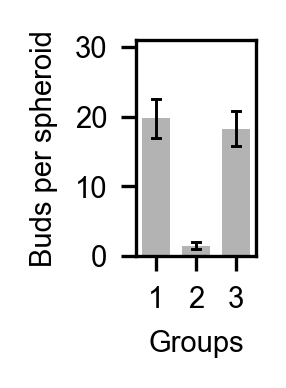

In [7]:
# Plot the bar graph to put in figures
outputPrefix = "20210204-11-dispase-recovery-D193-D267-mix-"
outputFigPath = '../jupyter_figures/' + outputPrefix + 'bud-count-bar.svg'

# Filter to plot only one data set (the other set is D267 only)
df = df[df.groups.isin(['1', '2', '3'])]

plotCountBar(df.groups, df.counts, outputFigPath,
             yMax=31,
             yTicks=[0,10,20,30],
             yLabel='Buds per spheroid',
#              xticklabels_angle=45,
#              xTickLabels=['Before dispase', 'After dispase', 'Recovery 6 day'],
#              xLabel_off=True,
             bar_width=.7,
             fig_width=.5, fig_height=.9)
